# Case Study - Portfolio Optimization
In this case study, we will build two $10,000 investment portfolios containing 15 Stocks and ETFs. The first portfolio will have an equal weighting between the stocks. The second portfolio will be optimized with a weighting allocation that provides the best return, adjusted for risk. To build these two portfolios, we will:
1. Import 5 years of data for 15 Stocks and ETFs from NASDAQ data base
2. Build the initial portfolio with equal weighting to each of the stocks
3. Analyze and visualize the equal-weighted portfolio
4. Generate 10,000 portfolio scenarios with random weighting to each of the stocks
5. Identify the optimal portfolio from the scenarios and visualize the results

## Import Packages & Connect to Data

In [46]:
# Import packages needed for case study
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# pd.set_option('mode.chained_assignment', None)

In [47]:
# List the 15 stock ticker symbols for our portfolio
stock_list = ["VT", "QUAL", "EFV", "EWZ","IRBO","VGT","ITA","SOXX","XLV","SPG","GMRE","AVB","STAG","EQIX","IAU"]

# Create an empty dictionary to store our stock info
stocks = {}

# Loop through each stock in the stock_list
for i_stock in stock_list:
    stocks[i_stock] = pd.read_csv(str(i_stock + ".csv"), parse_dates=True, index_col = 'Date')
    stocks[i_stock] = stocks[i_stock].drop(columns=["Volume","Open","High","Low"])
    stocks[i_stock] = stocks[i_stock].sort_values(by="Date")

In [48]:
# Examine the 'VT' Adj Close from the stocks dictionary
stocks['AVB'].head()

,Adj Close
Date,
2019-06-05,207.76
2019-06-06,208.74
2019-06-07,209.06
2019-06-10,209.36
2019-06-11,209.34


## Create the Equal-Weighted Portfolio
To create the equal-weighted portfolio, we need to add some additional columns to the DataFrames in the `stocks` dictionary. The three columns that we will build are:
* Normalized Return = Adjusted Close/ Adjusted Close on the `startdate` of the portfolio
* Allocation = Normalized Return * 0.0625 (equal weighting for each of the four stocks)
* Position Value = Allocation * 10,000 (value of the portfolio)

In [49]:
# Create 'Normalized Return' column for each stock
for stock_name, stock_data in stocks.items():
    stock_data['Adj Close'] = pd.to_numeric(stock_data['Adj Close'])
    first_adj_close = stock_data.iloc[0]['Adj Close'] # Select the first row from the Adj Close column
    stock_data['Normalized Return'] = stock_data['Adj Close'] / first_adj_close

In [50]:
stocks['ITA'].head()

,Adj Close,Normalized Return
Date,,
2019-06-05,105.075,1.000000
2019-06-06,105.360,1.002712
2019-06-07,105.980,1.008613
2019-06-10,105.330,1.002427
2019-06-11,102.895,0.979253


In [51]:
# Create allocation for each stock - equally weighted in our initial portfolio
for stock_name, stock_data in stocks.items():
    stock_data['Allocation'] = stock_data['Normalized Return'] * 0.06667

In [52]:
stocks['SPG'].head()

,Adj Close,Normalized Return,Allocation
Date,,,
2019-06-05,164.95,1.000000,0.066670
2019-06-06,163.63,0.991998,0.066136
2019-06-07,163.39,0.990543,0.066039
2019-06-10,161.39,0.978418,0.065231
2019-06-11,162.67,0.986178,0.065748


In [53]:
# Set the value of the portfolio to $10k
for stock_name, stock_data in stocks.items():
    stock_data['Position Value'] = stock_data['Allocation'] * 10000

In [54]:
stocks['EQIX'].head()

,Adj Close,Normalized Return,Allocation,Position Value
Date,,,,
2019-06-05,495.29,1.000000,0.066670,666.700000
2019-06-06,494.66,0.998728,0.066585,665.851970
2019-06-07,499.60,1.008702,0.067250,672.501605
2019-06-10,506.02,1.021664,0.068114,681.143439
2019-06-11,504.24,1.018070,0.067875,678.747417


## Visualize the Portfolio Performance
To visualize the performance of the portfolio, we can create two line charts that show the return of the portfolio, and the return of the individual stocks, over time. Let's build a new DataFrame that contains just the `position value` for each stock, as well as the total value for the portfolio. We can use this DataFrame to create the two visuals.

In [55]:
# Create position_values dictionary
position_values = {}

for stock_name, stock_data in stocks.items():
    position_values[stock_name] = stock_data['Position Value']

In [56]:
# Convert the position_values dictionary to a DataFrame
position_values = pd.DataFrame(data=position_values)

position_values = position_values.dropna()

position_values.head()

,VT,QUAL,EFV,EWZ,IRBO,VGT,ITA,SOXX,XLV,SPG,GMRE,AVB,STAG,EQIX,IAU
Date,,,,,,,,,,,,,,,
2019-06-05,666.700000,666.700000,666.700000,666.700000,666.700000,666.700000,666.700000,666.700000,666.700000,666.700000,666.700000,666.700000,666.700000,666.700000,666.700000
2019-06-06,669.814992,670.922961,669.484879,677.287632,664.986852,674.074040,668.508323,675.935254,670.122408,661.364783,676.037535,669.844811,669.992888,665.851970,668.271170
2019-06-07,676.594682,678.916423,677.282540,683.383542,676.693362,685.852485,672.442217,683.571301,677.116025,660.394744,678.527544,670.871688,672.627198,672.501605,671.937235
2019-06-10,679.434822,681.555774,678.674979,678.089726,688.114347,693.359992,668.317973,700.225519,679.124830,652.311082,667.945005,671.834386,673.066250,681.143439,666.176277
2019-06-11,681.358788,682.083644,681.738346,695.414942,688.685396,692.525825,652.867918,703.025767,678.008827,657.484626,673.547526,671.770206,673.724827,678.747417,664.605106


In [57]:
# Add 'Total' column to position values, summing the other columns
position_values['Total'] = position_values.sum(axis=1)

In [58]:
position_values.head()

,VT,QUAL,EFV,EWZ,IRBO,VGT,ITA,SOXX,XLV,SPG,GMRE,AVB,STAG,EQIX,IAU,Total
Date,,,,,,,,,,,,,,,,
2019-06-05,666.700000,666.700000,666.700000,666.700000,666.700000,666.700000,666.700000,666.700000,666.700000,666.700000,666.700000,666.700000,666.700000,666.700000,666.700000,10000.500000
2019-06-06,669.814992,670.922961,669.484879,677.287632,664.986852,674.074040,668.508323,675.935254,670.122408,661.364783,676.037535,669.844811,669.992888,665.851970,668.271170,10052.500499
2019-06-07,676.594682,678.916423,677.282540,683.383542,676.693362,685.852485,672.442217,683.571301,677.116025,660.394744,678.527544,670.871688,672.627198,672.501605,671.937235,10138.712591
2019-06-10,679.434822,681.555774,678.674979,678.089726,688.114347,693.359992,668.317973,700.225519,679.124830,652.311082,667.945005,671.834386,673.066250,681.143439,666.176277,10159.374400
2019-06-11,681.358788,682.083644,681.738346,695.414942,688.685396,692.525825,652.867918,703.025767,678.008827,657.484626,673.547526,671.770206,673.724827,678.747417,664.605106,10175.589161


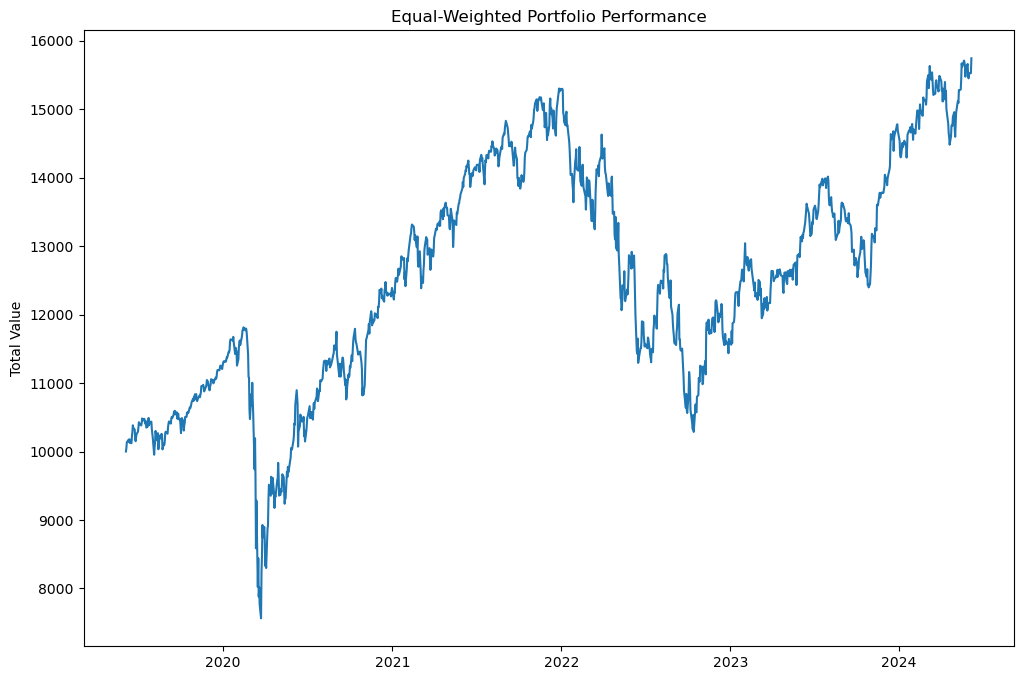

In [59]:
# View the total portfolio
plt.figure(figsize=(12, 8))

plt.plot(position_values['Total'])

plt.title('Equal-Weighted Portfolio Performance')
plt.ylabel('Total Value');

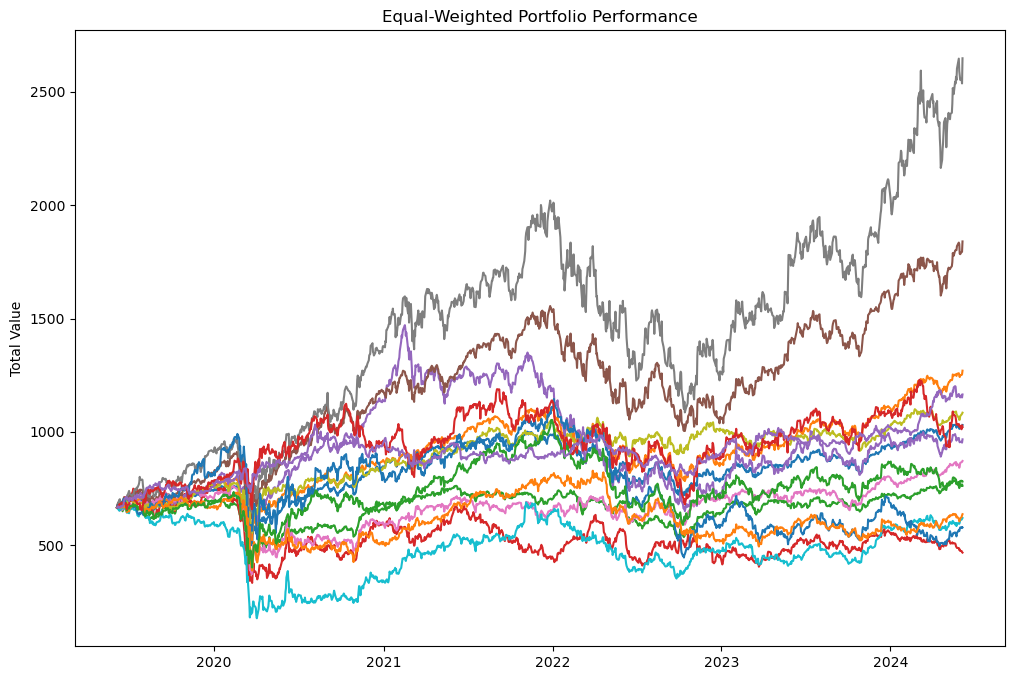

In [60]:
# View the 15 stocks in the portfolio
plt.figure(figsize=(12, 8))

plt.plot(position_values.iloc[:,0:15])

plt.title('Equal-Weighted Portfolio Performance')
plt.ylabel('Total Value');

<Axes: >

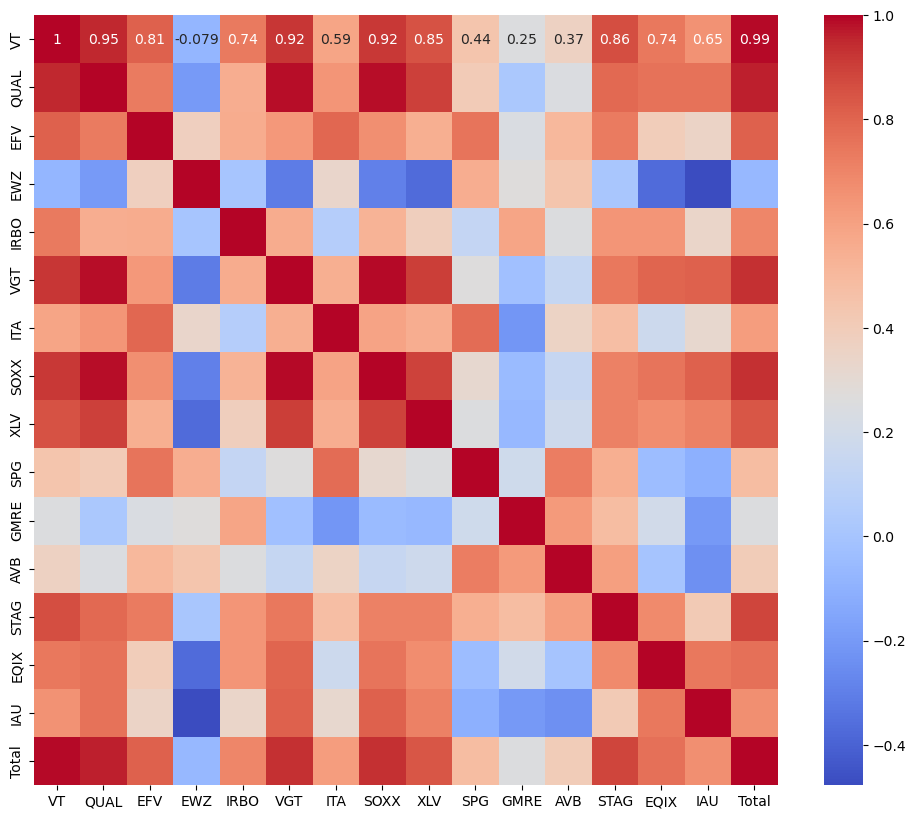

In [62]:
# Define the columns to include in correlation
corr_df = position_values

# Calculate the correlation matrix
corr_matrix = corr_df.corr()

# Create the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

## Calculate Performance Metrics for the Portfolio
Now that we have created and visualized the equal-weighted portfolio, we can calculate a few metrics to further measure the performance of the portfolio. We will create five performances metrics:
 * Cumulative Return
 * Mean Daily Return
 * Standard Deviation Daily Return
 * Sharpe Ratio
 * Annualized Sharpe Ratio

In [16]:
# Define the end and start value of the portfolio
end_value = position_values['Total'][-1]
start_value = position_values['Total'][0]

# Calculate the cumulative portfolio return as a percentage
cumulative_return = end_value / start_value - 1

print(str(round(cumulative_return*100,2)), '%')

57.44 %


C:\Users\guilh\AppData\Local\Temp\ipykernel_56328\3870122296.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end_value = position_values['Total'][-1]
C:\Users\guilh\AppData\Local\Temp\ipykernel_56328\3870122296.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_value = position_values['Total'][0]


In [17]:
# Create a 'Daily Returns' column
position_values['Daily Return'] = position_values['Total'].pct_change()

position_values.head()

,VT,QUAL,EFV,EWZ,IRBO,VGT,ITA,SOXX,XLV,SPG,GMRE,AVB,STAG,EQIX,IAU,Total,Daily Return
Date,,,,,,,,,,,,,,,,,
2019-06-05,666.700000,666.700000,666.700000,666.700000,666.700000,666.700000,666.700000,666.700000,666.700000,666.700000,666.700000,666.700000,666.700000,666.700000,666.700000,10000.500000,NaN
2019-06-06,669.814992,670.922961,669.484879,677.287632,664.986852,674.074040,668.508323,675.935254,670.122408,661.364783,676.037535,669.844811,669.992888,665.851970,668.271170,10052.500499,0.005200
2019-06-07,676.594682,678.916423,677.282540,683.383542,676.693362,685.852485,672.442217,683.571301,677.116025,660.394744,678.527544,670.871688,672.627198,672.501605,671.937235,10138.712591,0.008576
2019-06-10,679.434822,681.555774,678.674979,678.089726,688.114347,693.359992,668.317973,700.225519,679.124830,652.311082,667.945005,671.834386,673.066250,681.143439,666.176277,10159.374400,0.002038
2019-06-11,681.358788,682.083644,681.738346,695.414942,688.685396,692.525825,652.867918,703.025767,678.008827,657.484626,673.547526,671.770206,673.724827,678.747417,664.605106,10175.589161,0.001596


In [18]:
# Calculate the mean Daily Return 
mean_daily_return = position_values['Daily Return'].mean()

print('The mean daily return is:', str(round(mean_daily_return, 4)))

The mean daily return is: 0.0005


In [19]:
# Calculate the standard deviation of Daily Return 
std_daily_return = position_values['Daily Return'].std()

print('The std daily return is:', str(round(std_daily_return, 4)))

The std daily return is: 0.0135


### Sharpe Ratio
Now, let's explore a risk-adjusted return metric called the sharpe ratio. The sharpe ratio helps us quantify how much return we are getting by a given level of risk. When comparing two different investments against the same benchmark, the asset with the higher Sharpe ratio provides a higher return for the same amount of risk or the same return for a lower risk than the other asset. 

It is calculated by the average return of the portfolio minus a risk free rate (such as government bonds), divided by the standard deviation of the return. In this case, we assume the risk-free rate is close to zero, so we won't add it to the formula.

In [20]:
# Calculate the sharpe ratio
sharpe_ratio = mean_daily_return / std_daily_return

sharpe_ratio

0.033590680637023335

In [21]:
# Calculate the annualized sharpe ratio
sharpe_ratio_annualized = sharpe_ratio * 252**0.5

sharpe_ratio_annualized

0.5332355240097387

## Prepare Scenarios to Optimize Portfolio Weighting
We need to prepare our data ahead of generating our scenarios to optimize the portfolio weighting. We will:
 * Create a dictionary containing the adjusted close for each of our stocks: stock_adj_close
 * Create another dictionary that transforms the adjusted close for each day to a percent change from the previous day

In [22]:
# Create stock_adj_close dictionary
stock_adj_close = {}

for stock_name, stock_data in stocks.items():
    stock_adj_close[stock_name] = stock_data['Adj Close']

In [23]:
# Convert the stock_adj_close dictionary to a DataFrame
stock_adj_close = pd.DataFrame(data=stock_adj_close)

stock_adj_close.head()

,VT,QUAL,EFV,EWZ,IRBO,VGT,ITA,SOXX,XLV,SPG,GMRE,AVB,STAG,EQIX,IAU
Date,,,,,,,,,,,,,,,
2019-06-05,72.77,88.41,47.88,41.56,23.35,199.81,105.075,61.1167,89.61,164.95,10.71,207.76,30.37,495.29,25.46
2019-06-06,73.11,88.97,48.08,42.22,23.29,202.02,105.360,61.9633,90.07,163.63,10.86,208.74,30.52,494.66,25.52
2019-06-07,73.85,90.03,48.64,42.60,23.70,205.55,105.980,62.6633,91.01,163.39,10.90,209.06,30.64,499.60,25.66
2019-06-10,74.16,90.38,48.74,42.27,24.10,207.80,105.330,64.1900,91.28,161.39,10.73,209.36,30.66,506.02,25.44
2019-06-11,74.37,90.45,48.96,43.35,24.12,207.55,102.895,64.4467,91.13,162.67,10.82,209.34,30.69,504.24,25.38


In [24]:
# Create stock_returns DataFrames to see the day over day change in stock value
stock_returns = stock_adj_close.pct_change()

stock_returns.head()

,VT,QUAL,EFV,EWZ,IRBO,VGT,ITA,SOXX,XLV,SPG,GMRE,AVB,STAG,EQIX,IAU
Date,,,,,,,,,,,,,,,
2019-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-06,0.004672,0.006334,0.004177,0.015881,-0.002570,0.011061,0.002712,0.013852,0.005133,-0.008002,0.014006,0.004717,0.004939,-0.001272,0.002357
2019-06-07,0.010122,0.011914,0.011647,0.009000,0.017604,0.017474,0.005885,0.011297,0.010436,-0.001467,0.003683,0.001533,0.003932,0.009987,0.005486
2019-06-10,0.004198,0.003888,0.002056,-0.007746,0.016878,0.010946,-0.006133,0.024364,0.002967,-0.012241,-0.015596,0.001435,0.000653,0.012850,-0.008574
2019-06-11,0.002832,0.000775,0.004514,0.025550,0.000830,-0.001203,-0.023118,0.003999,-0.001643,0.007931,0.008388,-0.000096,0.000978,-0.003518,-0.002358


## Build & Run 10,000 Portfolio Scenarios
Now that we've prepared our data, we're almost ready to run our scenarios. First, we need to build the structures required to generate these scenarios and store the output. To do this, we will use the `numpy.zeros()` function. 

This function creates arrays that are filled with zeros. After we run the scenarios, we replace these zeros with the corresponding output. The reason we create the arrays with zeros first is to give our arrays the correct shape before we replace them with the correct values.

We will create four different arrays:
 * weights_array - this array will have 10,000 rows and 15 columns and hold the weighting allocation for each stock
 * returns_array - this array will contain the portfolio return for each scenario
 * volatility_array - this array will contain the portfolio volatility for each scenario
 * sharpe_array - this array will contain the sharpe ratio for each scenario

In [35]:
# Define the number of scenarios and create a blank array to populate stock weightings for each scenario
scenarios = 10000

weights_array = np.zeros((scenarios, len(stock_returns.columns)))

weights_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
# Create additional blank arrays for scenario output
returns_array = np.zeros(scenarios)
volatility_array = np.zeros(scenarios)
sharpe_array = np.zeros(scenarios)

In [37]:
import random
random.seed(14)
np.random.seed(14)

for index in range(scenarios): 
    # Generate 15 random numbers for each index
    numbers = np.array(np.random.random(15))
    
    # Divide each number by the sum of the numbers to generate the random weight
    weights = numbers / np.sum(numbers)
    
    # Save the weights in weights_array
    weights_array[index,:] = weights
    
    # Calculate the return for each scenario
    returns_array[index] = np.sum(stock_returns.mean()*252*weights)
    
    # Calculate the expected volatility for each scenario
    volatility_array[index] = np.sqrt(np.dot(weights.T,np.dot(stock_returns.cov()*252, weights)))

    # Calculate the Sharpe Ratio for each scenario 
    sharpe_array[index] = returns_array[index] / volatility_array[index]

In [38]:
print("The first combination:", weights_array[0])

The first combination: [0.06953233 0.10460291 0.11776175 0.00108869 0.04190474 0.12955595
 0.06942049 0.04306128 0.07294934 0.02993398 0.10911033 0.04630425
 0.07290725 0.00079468 0.09107202]


In [39]:
print("The sharpe ratio of the first portfolio:", sharpe_array[0])

The sharpe ratio of the first portfolio: 0.5870016906622553


## Identify the Optimal Portfolio
Now that we have the output for all 10,000 scenarios, we can identify the optimal portfolio. The optimal portfolio in this case study is the portfolio that has the highest sharpe ratio.

In [40]:
# Find the highest sharpe ratio in sharpe_array
sharpe_array.max()

0.7611774507392608

In [41]:
# Find the index of the optimal portfolio
index_max_sharpe = sharpe_array.argmax()
index_max_sharpe

4539

In [42]:
dataframe_maxsharpe = pd.DataFrame({
    'Stock': stock_list,
    'Weight': weights_array[index_max_sharpe,:]})

# Print the DataFrame
print(dataframe_maxsharpe)

   Stock    Weight
0     VT  0.010359
1   QUAL  0.122434
2    EFV  0.009773
3    EWZ  0.024500
4   IRBO  0.122292
5    VGT  0.130490
6    ITA  0.029845
7   SOXX  0.008073
8    XLV  0.186118
9    SPG  0.003308
10  GMRE  0.001964
11   AVB  0.008889
12  STAG  0.018339
13  EQIX  0.128559
14   IAU  0.195057


## Visualize the Optimal Portfolio & Portfolio Scenarios
Let's visualize our portfolio scenarios by using a scatter chart. We can use the volatility and returns arrays on each axis to see the relationship between risk and reward. As a final step, we can visualize where the optimal portfolio appears among all of the scenarios.

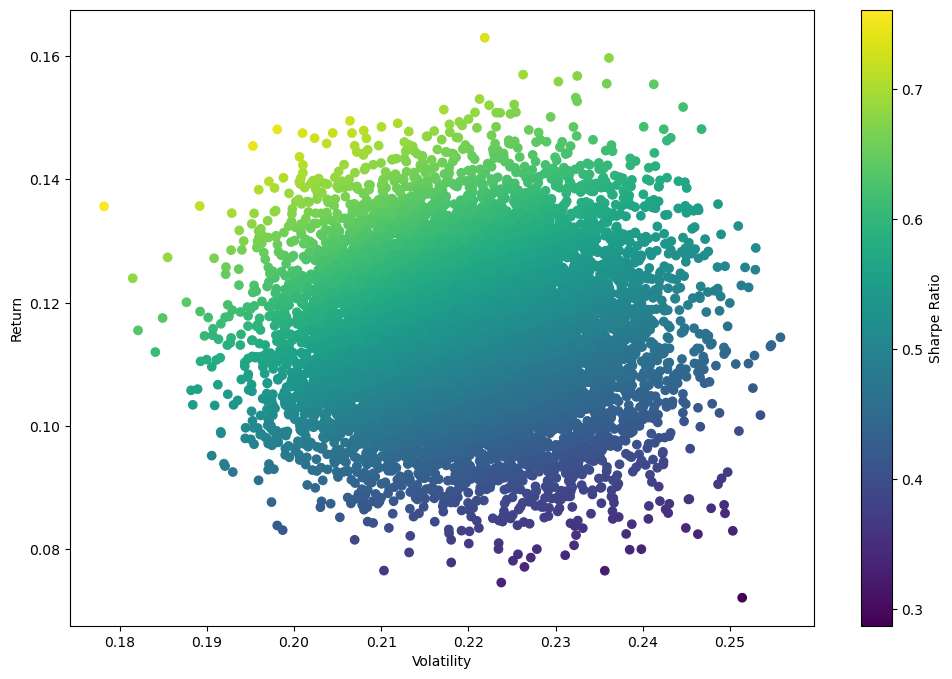

In [43]:
# Visualize volatility vs returns for each scenario
plt.figure(figsize=(12,8))

plt.scatter(volatility_array, returns_array, c=sharpe_array, cmap='viridis')

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return');

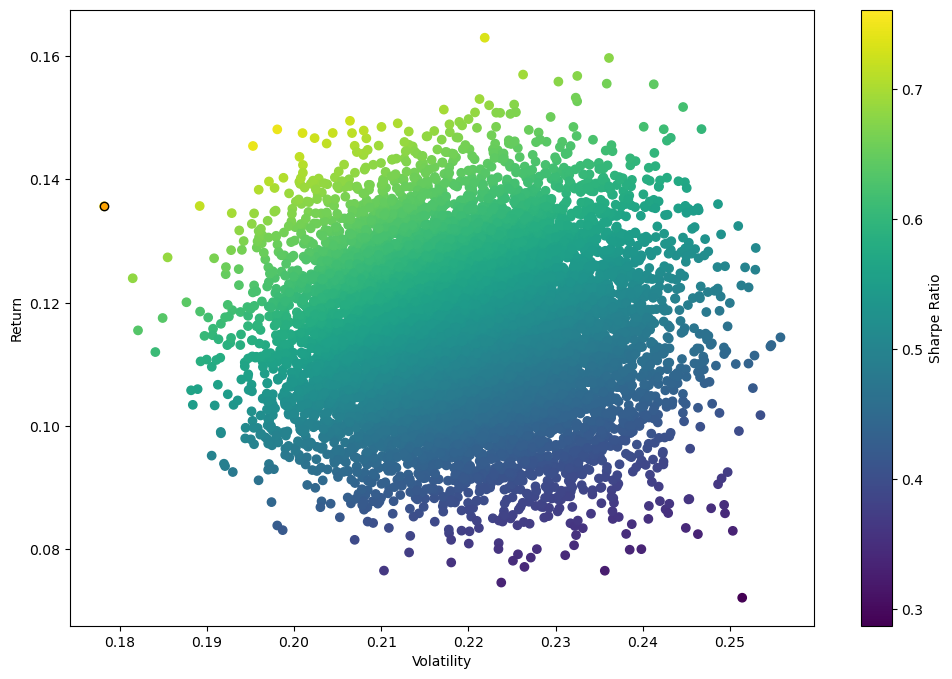

In [44]:
# Identify the optimal portfolio in the returns and volatility arrays
max_sharpe_return = returns_array[index_max_sharpe]
max_sharpe_volatility = volatility_array[index_max_sharpe]

# Visualize volatility vs returns for each scenario
plt.figure(figsize=(12,8))

plt.scatter(volatility_array, returns_array, c=sharpe_array, cmap='viridis')

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add the optimal portfolio to the visual
plt.scatter(max_sharpe_volatility, max_sharpe_return, c='orange', edgecolors='black');